In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
from IPython.core.display import clear_output
import numpy as np
import time
from optical_rl_gym.utils import find_nearest

<>:139: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:172: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:139: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:172: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_45770/4112099134.py:139: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'episode_frag_metric':


[ 50. 100. 150. 200. 250.]
SBR for exhausting oldest is [0.0010157646898102109, 0.02237348096971367, 0.07356137274580728, 0.12725913842465852, 0.16587716767176897]
SBR for oldest(10,10) is [0.0015032679738562092, 0.03302287581699346, 0.09235294117647058, 0.15130718954248365, 0.20186274509803923]
SBR for no_df is [0.001996699669966997, 0.0380940594059406, 0.10117161716171617, 0.1605940594059406, 0.21022277227722772]
the exhaustic vs. no df-[0.49, 0.41, 0.27, 0.21, 0.21]
the exhaustic vs. oldest-[0.32, 0.32, 0.2, 0.16, 0.18]


/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_45770/4112099134.py:172: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'service_blocking_per_hundred_arrivals':


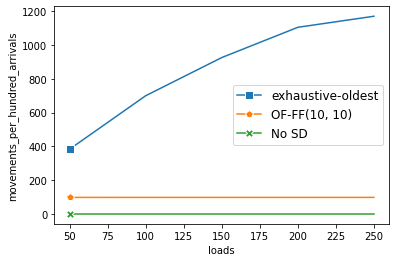

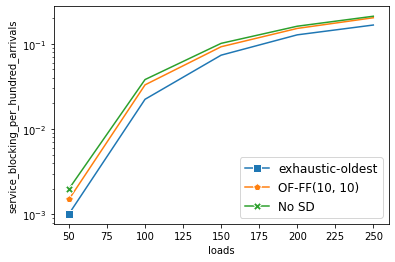

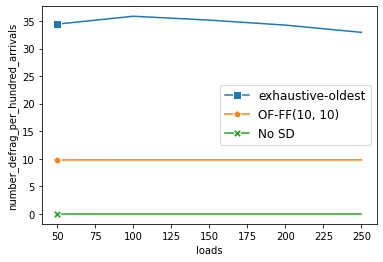

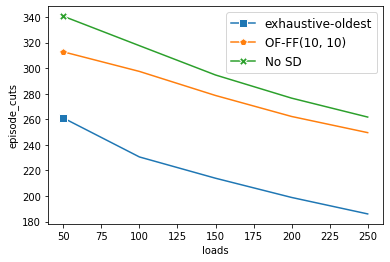

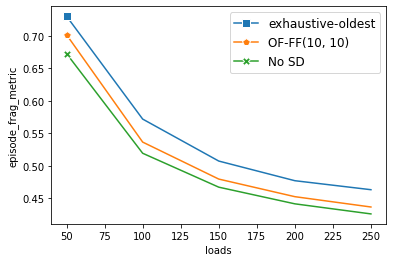

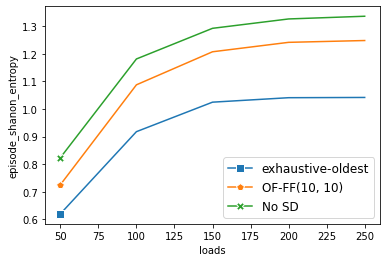

In [4]:
average_window = 100
average_window1  = 100
topology_name = 'nsfnet'
topology_name = 'Germany50'
heuristic_log_dir = './results/heuristic/'
figures_floder = './results4/figures'
# topology_name = 'Germany50'
# topology_name = 'Coronet'
topology_name='nsfnet_chen_eon'
os.makedirs(figures_floder, exist_ok=True)

min_load = 50
max_load = 265
step_length = 50
steps = int((max_load - min_load)/step_length) +1
loads = np.zeros(steps)
no_df_loads = {'episode_service_blocking_rate':[],
'number_movements_episode':[],
'number_defragmentation_procedure_episode':[],
'movements_per_hundred_arrivals':[], 
'service_blocking_per_hundred_arrivals':[],
'number_defrag_per_hundred_arrivals':[],
'episode_cuts':[],
'episode_frag_metric':[],
'episode_shanon_entropy':[]}
exhuastic_highest_loads = {'episode_service_blocking_rate':[],
'number_movements_episode':[],
'number_defragmentation_procedure_episode':[],
'movements_per_hundred_arrivals':[],
'service_blocking_per_hundred_arrivals':[],
'number_defrag_per_hundred_arrivals':[],
'episode_cuts':[],
'episode_frag_metric':[],
'episode_shanon_entropy':[]}
highest_loads = {'episode_service_blocking_rate':[],
'number_movements_episode':[],
'number_defragmentation_procedure_episode':[],
'movements_per_hundred_arrivals':[],
'service_blocking_per_hundred_arrivals':[],
'number_defrag_per_hundred_arrivals':[],
'episode_cuts':[],
'episode_frag_metric':[],
'episode_shanon_entropy':[]}
exhuastic_oldest_loads = {'episode_service_blocking_rate':[],
'number_movements_episode':[],
'number_defragmentation_procedure_episode':[],
'movements_per_hundred_arrivals':[],
'service_blocking_per_hundred_arrivals':[],
'number_defrag_per_hundred_arrivals':[],
'episode_cuts':[],
'episode_frag_metric':[],
'episode_shanon_entropy':[]}
oldest_loads = {'episode_service_blocking_rate':[],
'number_movements_episode':[],
'number_defragmentation_procedure_episode':[],
'movements_per_hundred_arrivals':[],
'service_blocking_per_hundred_arrivals':[],
'number_defrag_per_hundred_arrivals':[],
'episode_cuts':[],
'episode_frag_metric':[],
'episode_shanon_entropy':[]}


traffic_type = 1


for load_counter, load_traffic in enumerate(range(min_load,max_load,step_length)):
#     exhaustic_highest = pd.read_csv(f'./results4/heuristic15-{topology_name}-{traffic_type}/df-highest-1-400-True-{load_traffic}.monitor.csv', skiprows=1)
#     highest = pd.read_csv(f'./results4/heuristic15-{topology_name}-{traffic_type}/df-highest-10-10-True-{load_traffic}.monitor.csv', skiprows=1)
    no_df = pd.read_csv(f'./results4/heuristic15-{topology_name}-{traffic_type}/df{load_traffic}.monitor.csv', skiprows=1)
    exhaustic_oldest = pd.read_csv(f'./results4/heuristic15-{topology_name}-{traffic_type}/df-oldest-1-400-True-{load_traffic}.monitor.csv', skiprows=1)
    oldest = pd.read_csv(f'./results4/heuristic15-{topology_name}-{traffic_type}/df-oldest-10-10-True-{load_traffic}.monitor.csv', skiprows=1)
    ### exhaustic highest
    previous_value = 0
#     for rowid, row in exhaustic_highest.iterrows():
#         number_movements = row['number_movements_episode']
#         service_blocking_episode = row['service_blocked_eopisode']
#         number_defragmentation_episode = row['number_defragmentation_procedure_episode']
#         number_arrivals = row['number_arrivals']
#         # print(rowid, number_movements * (1000 / (number_arrivals - previous_value)))
#         exhaustic_highest.at[rowid, 'movements_per_hundred_arrivals'] = number_movements * (100 / (number_arrivals - previous_value+1))
#         exhaustic_highest.at[rowid, 'service_blocking_per_hundred_arrivals'] = service_blocking_episode * (1 / (number_arrivals - previous_value+1))
#         exhaustic_highest.at[rowid, 'number_defrag_per_hundred_arrivals'] = number_defragmentation_episode * (100 / (number_arrivals - previous_value+1))
#         previous_value = number_arrivals
#     ## highest
#     previous_value = 0
#     for rowid, row in highest.iterrows():
#         number_movements = row['number_movements_episode']
#         service_blocking_episode = row['service_blocked_eopisode']
#         number_defragmentation_episode = row['number_defragmentation_procedure_episode']
#         number_arrivals = row['number_arrivals']
#         # print(rowid, number_movements * (1000 / (number_arrivals - previous_value)))
#         highest.at[rowid, 'movements_per_hundred_arrivals'] = number_movements * (100 / (number_arrivals - previous_value+1) )
#         highest.at[rowid, 'service_blocking_per_hundred_arrivals'] = service_blocking_episode * (1 / (number_arrivals - previous_value+1))
#         highest.at[rowid, 'number_defrag_per_hundred_arrivals'] = number_defragmentation_episode * (100 / (number_arrivals - previous_value+1))
#         previous_value = number_arrivals
    ### no df
    previous_value = 0
    for rowid, row in no_df.iterrows():
        number_movements = row['number_movements_episode']
        service_blocking_episode = row['service_blocked_eopisode']
        number_defragmentation_episode = row['number_defragmentation_procedure_episode']
        number_arrivals = row['number_arrivals']
        # print(rowid, number_movements * (1000 / (number_arrivals - previous_value)))
        no_df.at[rowid, 'movements_per_hundred_arrivals'] = number_movements * (100 / (number_arrivals - previous_value+1))
        no_df.at[rowid, 'service_blocking_per_hundred_arrivals'] = service_blocking_episode * (1 / (number_arrivals - previous_value+1))
        no_df.at[rowid, 'number_defrag_per_hundred_arrivals'] = number_defragmentation_episode * (100 / (number_arrivals - previous_value+1))
        previous_value = number_arrivals
    
    ### exhaustic_oldest
    previous_value = 0
    for rowid, row in exhaustic_oldest.iterrows():
        number_movements = row['number_movements_episode']
        service_blocking_episode = row['service_blocked_eopisode']
        number_defragmentation_episode = row['number_defragmentation_procedure_episode']
        number_arrivals = row['number_arrivals']
        # print(rowid, number_movements * (1000 / (number_arrivals - previous_value)))
        exhaustic_oldest.at[rowid, 'movements_per_hundred_arrivals'] = number_movements * (100 / (number_arrivals - previous_value+1))
        exhaustic_oldest.at[rowid, 'service_blocking_per_hundred_arrivals'] = service_blocking_episode * (1 / (number_arrivals - previous_value+1))
        exhaustic_oldest.at[rowid, 'number_defrag_per_hundred_arrivals'] = number_defragmentation_episode * (100 / (number_arrivals - previous_value+1))
        previous_value = number_arrivals


    ### oldest
    for rowid, row in oldest.iterrows():
        number_movements = row['number_movements_episode']
        service_blocking_episode = row['service_blocked_eopisode']
        number_defragmentation_episode = row['number_defragmentation_procedure_episode']
        number_arrivals = row['number_arrivals']
        # print(rowid, number_movements * (1000 / (number_arrivals - previous_value)))
        oldest.at[rowid, 'movements_per_hundred_arrivals'] = number_movements * (100 / (number_arrivals - previous_value +1))
        oldest.at[rowid, 'service_blocking_per_hundred_arrivals'] = service_blocking_episode * (1 / (number_arrivals - previous_value+1))
        oldest.at[rowid, 'number_defrag_per_hundred_arrivals'] = number_defragmentation_episode * (100 / (number_arrivals - previous_value+1))
        previous_value = number_arrivals

    loads[load_counter] = load_traffic
    for info in ['movements_per_hundred_arrivals',
     'service_blocking_per_hundred_arrivals', 'number_defrag_per_hundred_arrivals','episode_cuts','episode_frag_metric','episode_shanon_entropy']:
        if info is 'episode_frag_metric':
            no_df_loads[info].append(np.mean(no_df[info])/200)
#             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info])/200)
#             highest_loads[info].append(np.mean(highest[info])/200)
            exhuastic_oldest_loads[info].append(np.mean(exhaustic_oldest[info])/200)
            oldest_loads[info].append(np.mean(oldest[info])/200)
        else:
            no_df_loads[info].append(np.mean(no_df[info]))
#             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info]))
#             highest_loads[info].append(np.mean(highest[info]))
            exhuastic_oldest_loads[info].append(np.mean(exhaustic_oldest[info]))
            oldest_loads[info].append(np.mean(oldest[info]))


print(loads)
print(f"SBR for exhausting oldest is {exhuastic_oldest_loads['service_blocking_per_hundred_arrivals']}")
print(f"SBR for oldest(10,10) is {oldest_loads['service_blocking_per_hundred_arrivals']}")
print(f"SBR for no_df is {no_df_loads['service_blocking_per_hundred_arrivals']}")

percentage = []
percentage1 = []
for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
    percentage.append((no_df_loads['service_blocking_per_hundred_arrivals'][i] - exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i])/no_df_loads['service_blocking_per_hundred_arrivals'][i])
for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
    percentage1.append((oldest_loads['service_blocking_per_hundred_arrivals'][i] - exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i])/oldest_loads['service_blocking_per_hundred_arrivals'][i])

print(f"the exhaustic vs. no df-{[round(item,2) for item in percentage]}")
print(f"the exhaustic vs. oldest-{[round(item,2) for item in percentage1]}")


for info in ['movements_per_hundred_arrivals',
     'service_blocking_per_hundred_arrivals', 'number_defrag_per_hundred_arrivals','episode_cuts','episode_frag_metric','episode_shanon_entropy']:
    plt.figure()
    if info is 'service_blocking_per_hundred_arrivals':
    
#         ax_exhuastic_highest = plt.semilogy(loads, exhuastic_highest_loads[info],  label='exhaustic-highest', marker= 's', markevery = 200, markersize= 8 , markeredgecolor='white')
#         ax_highest = plt.semilogy(loads, highest_loads[info],  label='HF-FF(10, 10)', marker = 'p', markevery = 200, markersize= 8 , markeredgecolor='white')
        ax_exhuastic_oldest = plt.semilogy(loads, exhuastic_oldest_loads[info],  label='exhaustic-oldest', marker= 's', markevery = 200, markersize= 8 , markeredgecolor='white')
        ax_oldest = plt.semilogy(loads, oldest_loads[info],  label='OF-FF(10, 10)', marker = 'p', markevery = 200, markersize= 8 , markeredgecolor='white')
        ax_no = plt.semilogy(loads, no_df_loads[info],  label='No SD', marker = 'X', markevery = 200, markersize= 8 , markeredgecolor='white')


        
    else:
#         print(f"SBR for exhausting oldest is {exhuastic_oldest_loads[info]}")
#         ax_exhuastic_highest = plt.plot(loads, exhuastic_highest_loads[info],  label='exhaustive-highest', marker= 's', markevery = 200, markersize= 8 , markeredgecolor='white')
#         ax_highest = plt.plot(loads, highest_loads[info],  label='HF-FF(10, 10)', marker = 'p', markevery = 200, markersize= 8 , markeredgecolor='white')
        ax_exhuastic_oldest = plt.plot(loads, exhuastic_oldest_loads[info],  label='exhaustive-oldest', marker= 's', markevery = 200, markersize= 8 , markeredgecolor='white')
        ax_oldest = plt.plot(loads, oldest_loads[info],  label='OF-FF(10, 10)', marker = 'p', markevery = 200, markersize= 8 , markeredgecolor='white')
        ax_no = plt.plot(loads, no_df_loads[info],  label='No SD', marker = 'X', markevery = 200, markersize= 8 , markeredgecolor='white')
    plt.xlabel('loads')
    plt.ylabel(info)

    plt.legend(fontsize=12)
    plt.savefig(f'{figures_floder}/{topology_name}-{traffic_type}-{info}.svg')
    
 
